In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pickle
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Path
model_path = '/content/drive/MyDrive/S5/STKI/STKI-PROJECT-DROWSINESS/DatasetFinal/model/fcnn_model.h5'
fitur_test_path = '/content/drive/MyDrive/S5/STKI/STKI-PROJECT-DROWSINESS/DatasetFinal/model/fitur_test_vggface.pkl'

In [ ]:
# Load Model
model = tf.keras.models.load_model(model_path)
print("Model berhasil dimuat.")

Model berhasil dimuat.


In [ ]:
# Load Test Features
with open(fitur_test_path, 'rb') as f:
    test_data = pickle.load(f)

test_features = test_data['features']
test_labels_encoded = test_data['labels']

In [ ]:
# Evaluasi Model
print("Evaluasi model pada data testing...")
predictions = model.predict(test_features)
predicted_labels = np.argmax(predictions, axis=1)

# Penanganan Tipe Data Label (String atau Angka)
label_mapping = {"Drowsy": 0, "Non Drowsy": 1}

# Konversi test_labels_encoded ke angka jika dalam bentuk string
if isinstance(test_labels_encoded[0], str):
    test_labels_encoded = np.array([label_mapping[label] for label in test_labels_encoded])

# Konversi predicted_labels ke angka jika dalam bentuk string
if isinstance(predicted_labels[0], str):
    predicted_labels = np.array([label_mapping[label] for label in predicted_labels])

# Classification Report
print("Classification Report:")
report = classification_report(test_labels_encoded, predicted_labels, target_names=["Drowsy", "Non Drowsy"])
print(report)

Evaluasi model pada data testing...
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Classification Report:
              precision    recall  f1-score   support

      Drowsy       1.00      1.00      1.00      3383
  Non Drowsy       1.00      1.00      1.00      2940

    accuracy                           1.00      6323
   macro avg       1.00      1.00      1.00      6323
weighted avg       1.00      1.00      1.00      6323



<Figure size 800x600 with 0 Axes>

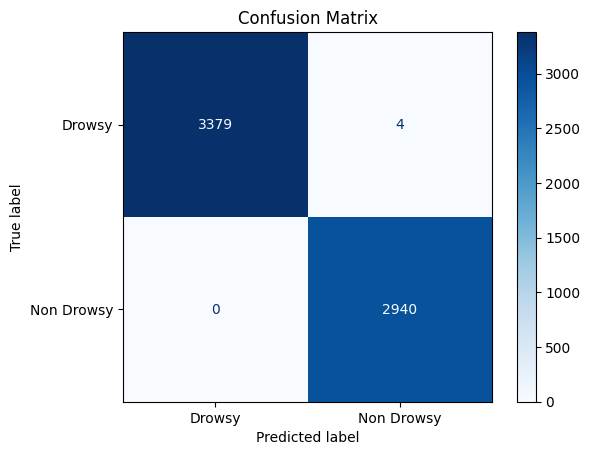

In [ ]:
# Visualisasi Confusion Matrix
cm = confusion_matrix(test_labels_encoded, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Drowsy", "Non Drowsy"])

plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()

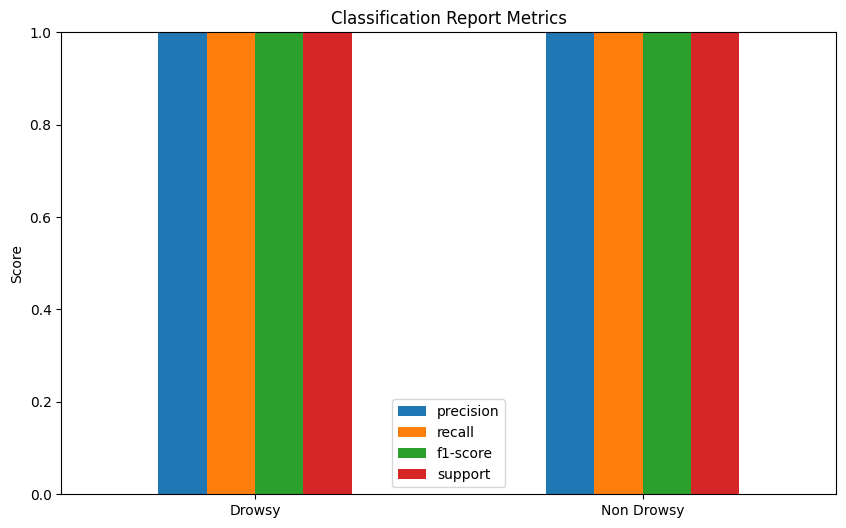

In [ ]:
# Visualisasi Classification Report (Bar Plot)
report_dict = classification_report(test_labels_encoded, predicted_labels, target_names=["Drowsy", "Non Drowsy"], output_dict=True)
df_report = pd.DataFrame(report_dict).transpose()

df_report[:-3].plot(kind='bar', figsize=(10, 6))  # Hindari plot support
plt.title("Classification Report Metrics")
plt.xticks(rotation=0)
plt.ylabel("Score")
plt.ylim(0, 1)
plt.show()